### **Projects in Advanced Machine Learning**
#### **GR5074**
#### **Homework 1**
#### **Cecilia Cabello Esquer**

# Instructions

Dataset:

Features
* Country or region
* GDP per capita
* Social support
* Healthy life expectancy
* Freedom to make life choices
* Generosity
* Perceptions of corruption

Target
* Happiness_level (Very High = Top 20% and Very Low = Bottom 20%)


## Install

In [0]:
! pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.1)


## Import

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import pickle

import sklearn

import keras

#import aimodelshare as ai

Using TensorFlow backend.


In [0]:
# Test-train
from sklearn.model_selection import train_test_split

# Preprocess
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Models
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

Import the data

In [0]:
data=pd.read_csv("worldhappiness2019.csv")

data.head()

,Happiness_level,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Very High,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,Very High,Denmark,1.383,1.573,0.996,0.592,0.252,0.410
2,Very High,Norway,1.488,1.582,1.028,0.603,0.271,0.341
3,Very High,Iceland,1.380,1.624,1.026,0.591,0.354,0.118
4,Very High,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298


##### Add region

In [0]:
regions= pd.read_csv('all.csv')
regions.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [0]:
print(data.info())
print(regions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
Happiness_level                 156 non-null object
Country or region               156 non-null object
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(6), object(2)
memory usage: 9.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
name                        249 non-null object
alpha-2                     248 non-null object
alpha-3                     249 non-null object
country-code                249 non-null int64
iso_3166-2                  249 non-null object
region                      248 non-null object
sub-region               

In [0]:
# Merge
data= pd.merge(data, regions[["name", "region"]], left_on='Country or region', right_on='name', how='left')
data= data.drop(['Country or region', 'name'], axis = 1) 
data= data.rename({'region':'Country or region'}, axis='columns')
data.head()

,Happiness_level,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country or region
0,Very High,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,Very High,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,Very High,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,Very High,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,Very High,1.396,1.522,0.999,0.557,0.322,0.298,Europe


In [0]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 8 columns):
Happiness_level                 156 non-null object
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
Country or region               134 non-null object
dtypes: float64(6), object(2)
memory usage: 11.0+ KB
None


#### 1. Explore bivariate results (Use visualizations!)
##### 1.1 Describe any relationships you see between particular features and the target variable


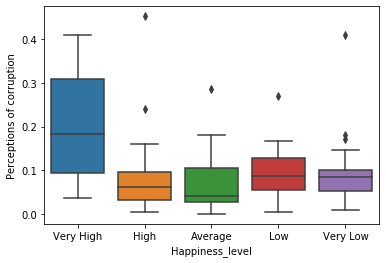

In [0]:
g= sns.boxplot(y="Perceptions of corruption", x="Happiness_level", data=data)

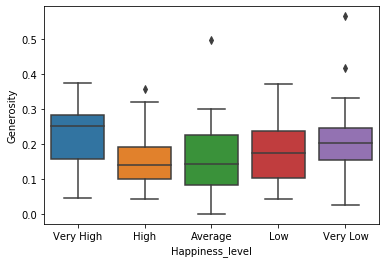

In [0]:
g= sns.boxplot(y="Generosity", x="Happiness_level", data=data)

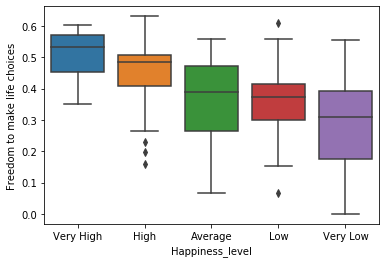

In [0]:
g= sns.boxplot(y="Freedom to make life choices", x="Happiness_level", data=data)

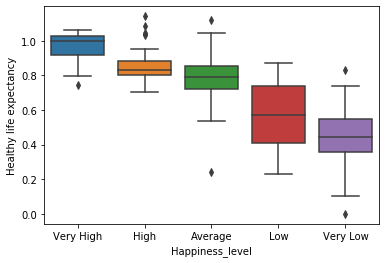

In [0]:
g= sns.boxplot(y="Healthy life expectancy", x="Happiness_level", data=data)

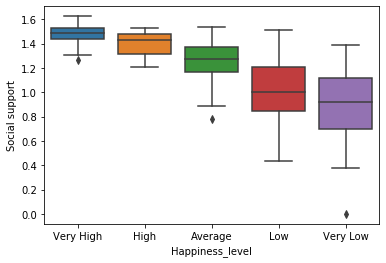

In [0]:
g= sns.boxplot(y="Social support", x="Happiness_level", data=data)

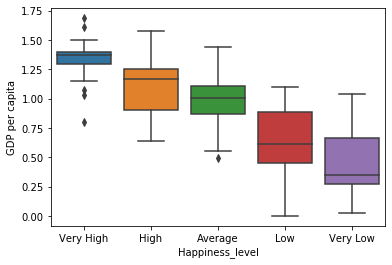

In [0]:
g= sns.boxplot(y="GDP per capita", x="Happiness_level", data=data)

When exploring the relationships between the target variable (*Happiness level*) and the particular features used in the UN calculations, it is shown that a positive correlation (and therefore likely influence) exists with *GDP per capita*, *Health expectancy*, and *Social support*. All of which are commonly considered to have colineality and depend on the income level of the population. Hence, these results are not surprising.

However, the relationship between *Happiness* and *Generosity* is not as clear, given the variations and averages on each level of the target variable.

#### 2. Examine features that predict happiness categories using one or more models that allow for automatic feature selection
##### 2.1 Explain any meaningful findings

### Divide train-test data

In [0]:
y=data['Happiness_level']
X=data.drop(['Happiness_level'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_train.columns.tolist())

(117, 7)
(117,)
['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Country or region']


In [0]:
X.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country or region
0,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,1.396,1.522,0.999,0.557,0.322,0.298,Europe


In [0]:
y.head()

0    Very High
1    Very High
2    Very High
3    Very High
4    Very High
Name: Happiness_level, dtype: object

In [0]:
print(X.shape)
print(y.shape)

(156, 7)
(156,)


### Preprocessing data

In [0]:
numeric_features=X.columns.tolist()
numeric_features.remove('Country or region')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Country or region']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [0]:
#Fit your preprocessor object
prediction_input_preprocessor=preprocessor.fit(X_train) 

In [0]:
# Check shape for keras input:
prediction_input_preprocessor.transform(X_train).shape

(117, 11)

In [0]:
# Check shape for keras output:
pd.get_dummies(y_train).shape

(117, 5)

#### Feature Selection

a) Random Forest Regressor + Select From Model

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=200)
formodel = forest.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))


print(formodel.feature_importances_)

[0.22599904 0.15796512 0.24242157 0.13050417 0.07033921 0.12555213
 0.00619142 0.02475552 0.01418841 0.00208342 0.        ]


In [0]:
sfm = SelectFromModel(formodel, threshold=.25)
sfm.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))
Xtrain_new = sfm.transform(prediction_input_preprocessor.transform(X_train)) # transform data to insert into new model

print(prediction_input_preprocessor.transform(X_train).shape)

(117, 11)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In this case no variables are zereod, leading us to believe are variables are relevant to the model.  

##### b) Lasso + Select from Model

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

lasso = LogisticRegression(penalty='l1', solver='saga')
lasso.fit(prediction_input_preprocessor.transform(X_train), y_train)

model = SelectFromModel(lasso, prefit=True)

X_new = model.transform(prediction_input_preprocessor.transform(X_train))
print(X_new.shape)

(117, 9)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False])

In contrast, to the Random Forest Classifier, the Lasso model zeroed 2 (*Generosity* and *Perception of corruption*) out of the 11 features. Leaving only 9 features, those relevant to the prediction of the target variable.

#### 3. Run at least three prediction models to try to predict World Happiness well.

#### 3.1 Discuss which models performed better and point out relevant hyper-parameter values for successful models.

Neural network

In [0]:
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))

model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
model.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train), 
               batch_size = 65, 
               epochs = 350, validation_split=0.2)  






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 93 samples, validate on 24 samples
Epoch 1/350





93/93 [==============================] - 0s 3ms/step - loss: 1.6037 - acc: 0.1720 - val_loss: 1.6451 - val_acc: 0.2500
Epoch 2/350
93/93 [==============================] - 0s 76us/step - loss: 1.6021 - acc: 0.1720 - val_loss: 1.6434 - val_acc: 0.2500
Epoch 3/350
93/93 [==============================] - 0s 75us/step - loss: 1.6001 - acc: 0.1720 - val_loss: 1.6420 - val_acc: 0.2500
Epoch 4/350
93/93 [==============================] - 0s 73us/step - loss: 1.5984 - acc: 0.1720 - val_loss: 1.6407 - val_acc: 0.2500
Epoch 5/350
93/93 [==============================] - 0s 95us/step - loss: 1.5967 - acc: 0.1720 - val_loss: 1.6397 - val_acc: 0.2500
Epoch 6/350
93/93 [==============================] - 0s 86us/step - loss: 1.5952 - acc: 0.1720 - val_loss: 1.6386 - val_acc: 0.2500
Epoch 7/350
93/93 [==============================] - 0s 60

In [0]:
# using predict_classes() for multi-class data to return predicted class index.

print(model.predict_classes(prediction_input_preprocessor.transform(X_test)))

## Estas son mis clases.
prediction_index=model.predict_classes(prediction_input_preprocessor.transform(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Function to use to return label from column index location
def index_to_label(labels,index_n): 
    return labels[index_n]
    
# Example: return label at predicted index location 1
index_to_label(labels,1)

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 1 0 1 4 3 0 0 2 2 1 0 3 2 3 1 4 4 4 1 4 3 3 3 1 2 2 1 0 4 0 2 1 4 2 4 4
 4 1]
['High', 'High', 'Average', 'High', 'Very Low', 'Very High', 'Average', 'Average', 'Low', 'Low', 'High', 'Average', 'Very High', 'Low', 'Very High', 'High', 'Very Low', 'Very Low', 'Very Low', 'High', 'Very Low', 'Very High', 'Very High', 'Very High', 'High', 'Low', 'Low', 'High', 'Average', 'Very Low', 'Average', 'Low', 'High', 'Very Low', 'Low', 'Very Low', 'Very Low', 'Very Low', 'High']


In [0]:
# Evaluating Keras Model

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata

model_eval_metrics( y_test,predicted_labels,classification="TRUE")


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.461538,0.46746,0.48381,0.477778,0,0,0,0


Random Forest

In [0]:
rf_m=RandomForestClassifier(n_estimators=1000, random_state = 4)

rf_m.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=rf_m.predict(prediction_input_preprocessor.transform(X_test))

print("Random Forest Classifier's cross validation accuracy:", np.mean(cross_val_score(rf_m, prediction_input_preprocessor.transform(X_train), y_train, cv=10)))
print("Random Forest Classifier's Test-Data prediction accuracy: {:.5f}".format(rf_m.score(prediction_input_preprocessor.transform(X_test), y_test)))

pickle.dump(rf_m, open( "rf_model.pkl", "wb" ) )

Random Forest Classifier's cross validation accuracy: 0.565909090909091
Random Forest Classifier's Test-Data prediction accuracy: 0.41026


In [0]:
modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.410256,0.420463,0.499603,0.416667,0,0,0,0


SVC

In [0]:
svc_m = SVC(kernel='rbf', class_weight='balanced')
svc_m.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=svc_m.predict(prediction_input_preprocessor.transform(X_test))

print("SVC's cross validation accuracy:", np.mean(cross_val_score(svc_m, prediction_input_preprocessor.transform(X_train), y_train, cv=10)))
print("SVC's Test-Data prediction accuracy: {:.5f}".format(svc_m.score(prediction_input_preprocessor.transform(X_test), y_test)))

pickle.dump(svc_m, open( "svc_model.pkl", "wb" ) )

SVC's cross validation accuracy: 0.5143939393939393
SVC's Test-Data prediction accuracy: 0.46154


In [0]:
modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.461538,0.466215,0.538492,0.475,0,0,0,0


In [0]:
log_m= LogisticRegression(penalty="l1", solver="saga")
log_m.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=log_m.predict(prediction_input_preprocessor.transform(X_test))

print("Lasso's cross validation accuracy:", np.mean(cross_val_score(log_m, prediction_input_preprocessor.transform(X_train), y_train, cv=10)))
print("Lasso's Test-Data prediction accuracy: {:.5f}".format(log_m.score(prediction_input_preprocessor.transform(X_test), y_test)))

pickle.dump(log_m, open( "log_model.pkl", "wb" ) )

Lasso's cross validation accuracy: 0.5742424242424242
Lasso's Test-Data prediction accuracy: 0.46154


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [0]:
modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.461538,0.464161,0.555556,0.483333,0,0,0,0


#### 3.2 Submit your best model to the leader board for the World Happiness AI Model Share competition.

##### You have the option to discuss these models in your report, but it is not required.


In [0]:
! pip3 install keras2onnx
! pip3 install onnxruntime

In [0]:
import os

if not os.path.exists('mymodel.onnx'):
    from keras2onnx import convert_keras
    onx = convert_keras(model, 'mymodel.onnx')
    with open("mymodel.onnx", "wb") as f:
        f.write(onx.SerializeToString())

In [0]:
aws_key_password_region = pickle.load( open( "worldhappiness_modelsubmission_keys.pkl", "rb" ) ) 

In [0]:
# Example Model Pre-launched into Model Share Site
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = ""
password = ""
region='us-east-1'
model_filepath="mymodel.onnx"   
preprocessor_filepath="preprocessor.pkl"
preprocessor="TRUE"

trainingdata=X_train

# Set aws keys for this project (these keys give you access to collaborate on a single project)

#Importing from object that stores keys so we do not print out keys for others to see.

aws_key_password_region = pickle.load( open( "worldhappiness_modelsubmission_keys.pkl", "rb" ) )

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]

In [0]:
import aimodelshare as ai
ai.submit_model(model_filepath=model_filepath, model_eval_metrics=modelevalobject,apiurl=apiurl, username=username, password=password, aws_key=aws_key,aws_password=aws_password, region=region, trainingdata=trainingdata,preprocessor_filepath=preprocessor_filepath,preprocessor=preprocessor)

Please review model details and then resubmit to update this model.


Submit SKLEARN

### Leaderboard

In [0]:
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = ""
password = ""
leaderboard = ai.get_leaderboard(apiurl, username, password, aws_key, aws_password, region)

LEADERBOARD RANKINGS:


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2,username,model_version,avg_ranking_classification,avg_ranking_regression
26,0.717949,0.717857,0.717857,0.727778,0,0,0,0,3scman,85,2.333333,1.0
16,0.717949,0.713796,0.719444,0.725000,0,0,0,0,3scman,70,2.333333,1.0
8,0.666667,0.675975,0.754286,0.700952,0,0,0,0,dhoward97,69,2.666667,1.0
62,0.692308,0.693333,0.700397,0.702778,0,0,0,0,3scman,62,4.000000,1.0
66,0.641026,0.642381,0.743590,0.682273,0,0,0,0,SUN-Wenjun,83,4.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.333333,0.337698,0.385556,0.322222,0,0,0,0,username2,3,40.000000,1.0
75,0.333333,0.337698,0.385556,0.322222,0,0,0,0,username2,2,40.000000,1.0
47,0.333333,0.337698,0.385556,0.322222,0,0,0,0,username2,6,40.000000,1.0
54,0.333333,0.336015,0.354048,0.325000,0,0,0,0,raquel904,102,40.666667,1.0


Link REPO: https://github.com/cecicabello/firstassignment